In [1]:
import pandas as pd
import numpy as np
# from Analytical_Functions import * 
import matplotlib 
from matplotlib import pyplot as plt

'''
what percentage of family income are remittances? by country? by urban/rural?
 - main_table.remittances_yn, main_table.remesa_amount, main_table.remesa_currency, 
 - looking at cash assistance only
 - main_table.exp_currency, .exp_monthly_* (monthly expense amounts)
 - main_table.exp_6months_currency, main_table.exp_6months_*
 - main_table.hh_income_first* second* third*
 - main_table.avf)income_consent, _currency, _amount
 (debt_consent, currency, amount)
 - main_table.programs_asistencia_gob
 - main_table. income_per_capita income_per_capita_tier
what percentage of family income goes to food, clothing, schooling, housing, farming inputs? by country? by urban/rural?
 - main_table.remesa_efectivo_uso, main_table.remesa_efectivo_uso_pct (percent of remittance towards x)
what percentage of the GDP on average are remittances? by country?
What amount in remittances does each country receive?
What amount in remittances does the NT receive?

- main_table.rural_urban

'''

In [2]:
%cd BigData/bigdata

/home/tzd/BigData/bigdata


In [3]:
main_df = pd.read_csv('data/main_table.csv')
hh_df = pd.read_csv('data/hh_roster.csv')
ext_df = pd.read_csv('data/mig_ext_roster.csv')
lut = pd.read_csv('data/answer_lookup.csv', usecols=[0,1,2,3], index_col='label')
lut = lut.rename(columns={'text_content':'response'})
main_lut = pd.read_csv('data/main_lookup.csv', index_col='label')

In [4]:
def look_up_response_meanings(label):
    print(label)
    if main_lut.loc[label,'type'] in ['c','mc','mco']:
        return lut.loc[label,['name','response']].set_index('name')
    else:
        return lut.loc[main_lut.loc[label,'type'], ['name','response']].set_index('name')

def index_with_meaning(df,label):
    new_indexes = df.index.astype(int).astype(str)
    if main_lut.loc[label,'type'] in ['c','mc','mco']:
        pass
    else:
        response_meanings = lut.loc[main_lut.loc[label,'type'], ['name','response']].set_index('name')
    return response_meanings.loc[new_indexes,'response']

#### What percentage of family income are remittances? by country? by urban/rural?

In [5]:
avg_income_consent_df = main_df.avg_income_consent.value_counts().to_frame()
avg_income_consent_df.index = index_with_meaning(avg_income_consent_df,'avg_income_consent')
avg_income_consent_df

,avg_income_consent
response,
Yes,3083
Not,1245
NS / NR,670


In [6]:
#NS/NR (99) means No Sabe/No Responde 
#(Spanish: Do Not Know/Does Not Answer; surveys)

In [7]:
df = main_df.avg_income_currency.to_frame()
df['avg_income_amount'] = main_df.avg_income_amount
# Use the conversion rate 1 Guatemalan Quetzals to 0.13 U.S. Dollar.
# Use the conversion rate 1 Honduram Lempiras to 0.041 U.S. Dollar.

In [8]:
df['avg_income_consent'] = main_df.avg_income_consent

In [9]:
df

,avg_income_currency,avg_income_amount,avg_income_consent
0,NaN,NaN,99
1,1.0,500.0,1
2,1.0,300.0,1
3,1.0,350.0,1
4,1.0,347.0,1
...,...,...,...
4993,3.0,260.0,1
4994,3.0,247.0,1
4995,3.0,650.0,1
4996,3.0,65.0,1


In [10]:
look_up_response_meanings('avg_income_currency')

avg_income_currency


,response
name,
1,Dollars
2,Lempiras
3,Quetzals


In [11]:
def convert_to_usd(currency, amount):
    if currency == 1:
        return amount
    elif currency == 2:
        return (.13 * amount)
    elif currency == 3:
        return (.041 * amount)

In [12]:
df['AVG_INCOME_USD'] = df.apply(lambda x: convert_to_usd(x['avg_income_currency'],x['avg_income_amount']),axis=1)

In [13]:
df

,avg_income_currency,avg_income_amount,avg_income_consent,AVG_INCOME_USD
0,NaN,NaN,99,NaN
1,1.0,500.0,1,500.000
2,1.0,300.0,1,300.000
3,1.0,350.0,1,350.000
4,1.0,347.0,1,347.000
...,...,...,...,...
4993,3.0,260.0,1,10.660
4994,3.0,247.0,1,10.127
4995,3.0,650.0,1,26.650
4996,3.0,65.0,1,2.665


In [14]:
df.describe()

,avg_income_currency,avg_income_amount,avg_income_consent,AVG_INCOME_USD
count,3083.000000,3083.000000,4998.000000,3083.000000
mean,1.999676,296.644804,13.888155,121.994047
std,0.881897,400.780934,33.493581,237.254696
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,124.900000,1.000000,10.660000
50%,2.000000,200.000000,1.000000,31.980000
75%,3.000000,328.000000,1.000000,150.000000
max,3.000000,8450.000000,99.000000,4500.000000


In [15]:
print(f"Avg Household Income per month among those that consented (n={avg_income_consent_df.loc['Yes','avg_income_consent']}/{df.sum()[0]}) in USD: {np.round(df.AVG_INCOME_USD.mean(),2)}. Std: {np.round(df.AVG_INCOME_USD.std(),2)}")


Avg Household Income per month among those that consented (n=3083/6165.0) in USD: 121.99. Std: 237.25


In [16]:
df['country'] = main_df.country
df['rural_urban'] = main_df.rural_urban

In [17]:
df

,avg_income_currency,avg_income_amount,avg_income_consent,AVG_INCOME_USD,country,rural_urban
0,NaN,NaN,99,NaN,SLV,2
1,1.0,500.0,1,500.000,SLV,2
2,1.0,300.0,1,300.000,SLV,2
3,1.0,350.0,1,350.000,SLV,2
4,1.0,347.0,1,347.000,SLV,2
...,...,...,...,...,...,...
4993,3.0,260.0,1,10.660,GT,2
4994,3.0,247.0,1,10.127,GT,2
4995,3.0,650.0,1,26.650,GT,2
4996,3.0,65.0,1,2.665,GT,2


In [18]:
look_up_response_meanings('rural_urban')

rural_urban


,response
name,
1,Rural
2,Urban


#### Total amount of Remittances in the NT 

In [19]:
main_df.remittances_yn

0       0
1       1
2       0
3       0
4       0
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: remittances_yn, Length: 4998, dtype: int64

In [20]:
remitt_yn_df = main_df.remittances_yn.value_counts().to_frame()
remitt_yn_df.index = index_with_meaning(remitt_yn_df,'remittances_yn')
remitt_yn_df

,remittances_yn
response,
Not,3532
Yes,1447
NS / NR,19


In [21]:
main_df.shape[0] - remitt_yn_df.sum()

remittances_yn    0
dtype: int64

In [22]:
remitt_consent_df = main_df.remesa_amount_consent.value_counts().to_frame()
# remitt_consent_df.index = remitt_consent_df.index.astype(str)
remitt_consent_df.index = index_with_meaning(remitt_consent_df,'remesa_amount_consent')
remitt_consent_df

,remesa_amount_consent
response,
Yes,1027
Not,271
NS / NR,117


In [23]:
main_df.shape[0] - remitt_consent_df.sum()

remesa_amount_consent    3583
dtype: int64

In [24]:
main_df.remesa_currency.count()

1027

In [25]:
main_df.remesa_amount.count()

1027

In [26]:
df['remittances_yn'] = main_df.remittances_yn
df['remesa_amount_consent'] = main_df.remesa_amount_consent
df['remesa_currency'] = main_df.remesa_currency
df['remesa_amount'] = main_df.remesa_amount
df['REMESA_AMOUNT_USD'] = df.apply(lambda x: convert_to_usd(x['remesa_currency'],x['remesa_amount']),axis=1)


In [27]:
main_df.remesa_freq.value_counts()

3.0     556
4.0     172
5.0     149
6.0     138
2.0     136
8.0     127
7.0      83
1.0      42
9.0      24
99.0     20
Name: remesa_freq, dtype: int64

In [28]:
df['remesa_freq'] = main_df.remesa_freq

In [29]:
look_up_response_meanings('remesa_freq')

remesa_freq


,response
name,
1,Every week or less
2,Every fifteen days
3,Each month
4,Every two months
5,Every three months
6,Every six months
7,Once a year
8,"On extraordinary occasions (celebrations, deat..."
9,Other


In [30]:
#want remesa per month (same as income units)

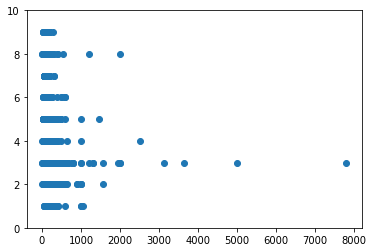

In [31]:
plt.scatter(main_df.remesa_amount,main_df.remesa_freq)
plt.ylim(0,10)
# plt.xlim(0,1000)
plt.show()

In [32]:
def amount_per_month(amount,freq):
    if freq == 1:
        return amount * 4.3
    elif freq == 2:
        return amount * 2
    elif freq == 3:
        return amount
    elif freq == 4 :
        return amount / 2
    elif freq == 5:
        return amount / 3
    elif freq == 6:
        return amount / 6
    elif freq == 7:
        return amount / 12
    else:
        return np.nan #could refine

In [33]:
df['REMESA_AMOUNT_REGPERMONTH'] = df.apply(lambda x: amount_per_month(x['REMESA_AMOUNT_USD'],x['remesa_freq']),axis=1)

In [34]:
df

,avg_income_currency,avg_income_amount,avg_income_consent,AVG_INCOME_USD,country,rural_urban,remittances_yn,remesa_amount_consent,remesa_currency,remesa_amount,REMESA_AMOUNT_USD,remesa_freq,REMESA_AMOUNT_REGPERMONTH
0,NaN,NaN,99,NaN,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,500.0,1,500.000,SLV,2,1,0.0,NaN,NaN,NaN,3.0,NaN
2,1.0,300.0,1,300.000,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,350.0,1,350.000,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,347.0,1,347.000,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3.0,260.0,1,10.660,GT,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4994,3.0,247.0,1,10.127,GT,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4995,3.0,650.0,1,26.650,GT,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4996,3.0,65.0,1,2.665,GT,2,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
print(f"Avg Household Income per month among those that consented (n={avg_income_consent_df.loc['Yes','avg_income_consent']}/{df.sum()[0]}) in USD: {np.round(df.AVG_INCOME_USD.mean(),2)}. Std: {np.round(df.AVG_INCOME_USD.std(),2)}")


Avg Household Income per month among those that consented (n=3083/6165.0) in USD: 121.99. Std: 237.25


In [36]:
print(f"Avg remittance amount per month among those that receive remittances, consented to sharing amount, and those that receive somewhat frequently (n={df.REMESA_AMOUNT_REGPERMONTH.count()}/{df.shape[0]}) in USD: {np.round(df.REMESA_AMOUNT_REGPERMONTH.mean(),2)}. Std: {np.round(df.REMESA_AMOUNT_REGPERMONTH.std(),2)}")


Avg remittance amount per month among those that receive remittances, consented to sharing amount, and those that receive somewhat frequently (n=927/4998) in USD: 127.16. Std: 347.72


In [37]:
#Avg percent of income that is remittance 
df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1), 'REMESA_AMOUNT_REGPERMONTH'] / df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1), 'AVG_INCOME_USD']

6       0.416667
12      0.166667
13      0.136364
21      0.100000
23      0.277778
          ...   
4962    0.857143
4967    0.750000
4975    2.680247
4986    2.800000
4989    0.250000
Length: 710, dtype: float64

In [38]:
#temp.loc[temp > 100]

In [39]:
df.loc[2941]

avg_income_currency            1
avg_income_amount              0
avg_income_consent             1
AVG_INCOME_USD                 0
country                      SLV
rural_urban                    1
remittances_yn                 1
remesa_amount_consent          1
remesa_currency                1
remesa_amount                100
REMESA_AMOUNT_USD            100
remesa_freq                    2
REMESA_AMOUNT_REGPERMONTH    200
Name: 2941, dtype: object

In [40]:
remit_and_consents_df = df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1)]

In [41]:
remit_and_consents_df = remit_and_consents_df.drop(index = remit_and_consents_df.loc[remit_and_consents_df['avg_income_amount'] == 0].index)

In [42]:
(remit_and_consents_df['REMESA_AMOUNT_REGPERMONTH'] / remit_and_consents_df['AVG_INCOME_USD']).mean()

2.0195008279580113

In [43]:
remit_and_consents_df.iloc[0]

avg_income_currency            1
avg_income_amount            240
avg_income_consent             1
AVG_INCOME_USD               240
country                      SLV
rural_urban                    2
remittances_yn                 1
remesa_amount_consent          1
remesa_currency                1
remesa_amount                100
REMESA_AMOUNT_USD            100
remesa_freq                    3
REMESA_AMOUNT_REGPERMONTH    100
Name: 6, dtype: object

In [44]:
remit_and_consents_df.iloc[100]

avg_income_currency            1
avg_income_amount            120
avg_income_consent             1
AVG_INCOME_USD               120
country                      SLV
rural_urban                    1
remittances_yn                 1
remesa_amount_consent          1
remesa_currency                1
remesa_amount                120
REMESA_AMOUNT_USD            120
remesa_freq                    3
REMESA_AMOUNT_REGPERMONTH    120
Name: 703, dtype: object

In [45]:
(remit_and_consents_df['REMESA_AMOUNT_REGPERMONTH'] / (remit_and_consents_df['REMESA_AMOUNT_REGPERMONTH']  + remit_and_consents_df['AVG_INCOME_USD'])).mean()

0.3600336014733176

In [46]:
# df.to_csv('vars_of_interest_v1.csv')

In [47]:
remit_and_consents_df.country.value_counts()

SLV    338
GT     220
HND    151
Name: country, dtype: int64

In [48]:
#df = pd.read_csv('vars_of_interest_v1.csv',index_col=0)

In [49]:
df.head()

,avg_income_currency,avg_income_amount,avg_income_consent,AVG_INCOME_USD,country,rural_urban,remittances_yn,remesa_amount_consent,remesa_currency,remesa_amount,REMESA_AMOUNT_USD,remesa_freq,REMESA_AMOUNT_REGPERMONTH
0,NaN,NaN,99,NaN,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,500.0,1,500.0,SLV,2,1,0.0,NaN,NaN,NaN,3.0,NaN
2,1.0,300.0,1,300.0,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,350.0,1,350.0,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,347.0,1,347.0,SLV,2,0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.shape

(4998, 13)

In [51]:
look_up_response_meanings('remesa_efectivo_uso')

remesa_efectivo_uso


,response
name,
1,Food purchase
2,Health expenses (medicines / medical consultat...
3,Expenses related to COVID-19 (protection suppl...
4,Education expenses
5,"Payment of services (water, electricity, cable..."
6,Clothes and shoes
7,Housing (construction or repair)
8,Housing rental fee
9,Home purchase fee


In [52]:
[column for column in main_df.columns if 'remesa_efectivo_uso_pc' in column]

['remesa_efectivo_uso_pct/1',
 'remesa_efectivo_uso_pct/2',
 'remesa_efectivo_uso_pct/3',
 'remesa_efectivo_uso_pct/4',
 'remesa_efectivo_uso_pct/5',
 'remesa_efectivo_uso_pct/6',
 'remesa_efectivo_uso_pct/7',
 'remesa_efectivo_uso_pct/8',
 'remesa_efectivo_uso_pct/9',
 'remesa_efectivo_uso_pct/10',
 'remesa_efectivo_uso_pct/11',
 'remesa_efectivo_uso_pct/12',
 'remesa_efectivo_uso_pct/13',
 'remesa_efectivo_uso_pct/14',
 'remesa_efectivo_uso_pct/15',
 'remesa_efectivo_uso_pct/16']

In [53]:
[column for column in main_df.columns if 'remesa_efectivo_uso' in column]

['remesa_efectivo_uso',
 'remesa_efectivo_uso/1',
 'remesa_efectivo_uso/2',
 'remesa_efectivo_uso/3',
 'remesa_efectivo_uso/4',
 'remesa_efectivo_uso/5',
 'remesa_efectivo_uso/6',
 'remesa_efectivo_uso/7',
 'remesa_efectivo_uso/8',
 'remesa_efectivo_uso/9',
 'remesa_efectivo_uso/10',
 'remesa_efectivo_uso/11',
 'remesa_efectivo_uso/12',
 'remesa_efectivo_uso/13',
 'remesa_efectivo_uso/14',
 'remesa_efectivo_uso/15',
 'remesa_efectivo_uso/16',
 'remesa_efectivo_uso/99',
 'remesa_efectivo_uso_pct/1',
 'remesa_efectivo_uso_pct/2',
 'remesa_efectivo_uso_pct/3',
 'remesa_efectivo_uso_pct/4',
 'remesa_efectivo_uso_pct/5',
 'remesa_efectivo_uso_pct/6',
 'remesa_efectivo_uso_pct/7',
 'remesa_efectivo_uso_pct/8',
 'remesa_efectivo_uso_pct/9',
 'remesa_efectivo_uso_pct/10',
 'remesa_efectivo_uso_pct/11',
 'remesa_efectivo_uso_pct/12',
 'remesa_efectivo_uso_pct/13',
 'remesa_efectivo_uso_pct/14',
 'remesa_efectivo_uso_pct/15',
 'remesa_efectivo_uso_pct/16']

In [54]:
{f'remesa_efectivo_uso_pct/{i}':val[0] for i,val in look_up_response_meanings('remesa_efectivo_uso').iterrows()}

remesa_efectivo_uso


{'remesa_efectivo_uso_pct/1': 'Food purchase',
 'remesa_efectivo_uso_pct/2': 'Health expenses (medicines / medical consultation)',
 'remesa_efectivo_uso_pct/3': 'Expenses related to COVID-19 (protection supplies, medical consultation, medicines)',
 'remesa_efectivo_uso_pct/4': 'Education expenses',
 'remesa_efectivo_uso_pct/5': 'Payment of services (water, electricity, cable, internet, communication)',
 'remesa_efectivo_uso_pct/6': 'Clothes and shoes',
 'remesa_efectivo_uso_pct/7': 'Housing (construction or repair)',
 'remesa_efectivo_uso_pct/8': 'Housing rental fee',
 'remesa_efectivo_uso_pct/9': 'Home purchase fee',
 'remesa_efectivo_uso_pct/10': 'Purchase of agricultural inputs',
 'remesa_efectivo_uso_pct/11': 'Business (trade)',
 'remesa_efectivo_uso_pct/12': 'Saving',
 'remesa_efectivo_uso_pct/13': 'Payment of commitments of members residing abroad',
 'remesa_efectivo_uso_pct/14': "Payment of the sender's travel debt",
 'remesa_efectivo_uso_pct/15': 'Payment of other debts',
 'rem

In [55]:
main_df[[column for column in main_df.columns if 'remesa_efectivo_uso_pc' in column]].columns

Index(['remesa_efectivo_uso_pct/1', 'remesa_efectivo_uso_pct/2',
       'remesa_efectivo_uso_pct/3', 'remesa_efectivo_uso_pct/4',
       'remesa_efectivo_uso_pct/5', 'remesa_efectivo_uso_pct/6',
       'remesa_efectivo_uso_pct/7', 'remesa_efectivo_uso_pct/8',
       'remesa_efectivo_uso_pct/9', 'remesa_efectivo_uso_pct/10',
       'remesa_efectivo_uso_pct/11', 'remesa_efectivo_uso_pct/12',
       'remesa_efectivo_uso_pct/13', 'remesa_efectivo_uso_pct/14',
       'remesa_efectivo_uso_pct/15', 'remesa_efectivo_uso_pct/16'],
      dtype='object')

In [56]:
df = df.merge(main_df[[column for column in main_df.columns if 'remesa_efectivo_uso_pc' in column]].rename(columns={f'remesa_efectivo_uso_pct/{i}':f"pct_remit_towards_{val[0].replace(' ','')}" for i,val in look_up_response_meanings('remesa_efectivo_uso').iterrows()}),left_index=True,right_index=True,how='outer')

remesa_efectivo_uso


In [57]:
# df.to_csv('vars_of_interest_v2.csv')

In [58]:
remit_and_consents_df = df.loc[(df.remittances_yn == 1) & (df.remesa_amount_consent == 1) & (df.remesa_freq < 8) & (df.avg_income_consent == 1)]

In [59]:
remit_and_consents_df = remit_and_consents_df.drop(index = remit_and_consents_df.loc[remit_and_consents_df['avg_income_amount'] == 0].index)

In [60]:
remit_and_consents_df.iloc[0]

avg_income_currency                                                                                1
avg_income_amount                                                                                240
avg_income_consent                                                                                 1
AVG_INCOME_USD                                                                                   240
country                                                                                          SLV
rural_urban                                                                                        2
remittances_yn                                                                                     1
remesa_amount_consent                                                                              1
remesa_currency                                                                                    1
remesa_amount                                                                              

In [61]:
remit_and_consents_df = remit_and_consents_df.drop(columns=['avg_income_currency','avg_income_amount','remesa_currency','remesa_amount','remesa_freq','remittances_yn','remesa_amount_consent','avg_income_consent'])

In [62]:
remit_and_consents_df.shape

(709, 21)

In [63]:
long_cols = remit_and_consents_df.columns
for i in long_cols:
    print(i)

AVG_INCOME_USD
country
rural_urban
REMESA_AMOUNT_USD
REMESA_AMOUNT_REGPERMONTH
pct_remit_towards_Foodpurchase
pct_remit_towards_Healthexpenses(medicines/medicalconsultation)
pct_remit_towards_ExpensesrelatedtoCOVID-19(protectionsupplies,medicalconsultation,medicines)
pct_remit_towards_Educationexpenses
pct_remit_towards_Paymentofservices(water,electricity,cable,internet,communication)
pct_remit_towards_Clothesandshoes
pct_remit_towards_Housing(constructionorrepair)
pct_remit_towards_Housingrentalfee
pct_remit_towards_Homepurchasefee
pct_remit_towards_Purchaseofagriculturalinputs
pct_remit_towards_Business(trade)
pct_remit_towards_Saving
pct_remit_towards_Paymentofcommitmentsofmembersresidingabroad
pct_remit_towards_Paymentofthesender'straveldebt
pct_remit_towards_Paymentofotherdebts
pct_remit_towards_Other


In [64]:
new_cols=[
'avg_income_usd',
'country',
'rural_urban',
'remesa_amount_usd',
'monthly_remesa_amount',
'Food',
'Health',
'COVID_19',
'Education',
'Utilities',
'ClothesandShoes',
'Housing',
'HousingRental',
'HomePurchase',
'AgriculturalInputs',
'BusinessVentures',
'Saving',
'MigantsComittments',
'MigrationLoanDebt',
'OtherDebts',
'Other'
]

In [65]:
all_col_names = {}
for index,name in enumerate(long_cols):
    all_col_names[name]=new_cols[index]
all_col_names

{'AVG_INCOME_USD': 'avg_income_usd',
 'country': 'country',
 'rural_urban': 'rural_urban',
 'REMESA_AMOUNT_USD': 'remesa_amount_usd',
 'REMESA_AMOUNT_REGPERMONTH': 'monthly_remesa_amount',
 'pct_remit_towards_Foodpurchase': 'Food',
 'pct_remit_towards_Healthexpenses(medicines/medicalconsultation)': 'Health',
 'pct_remit_towards_ExpensesrelatedtoCOVID-19(protectionsupplies,medicalconsultation,medicines)': 'COVID_19',
 'pct_remit_towards_Educationexpenses': 'Education',
 'pct_remit_towards_Paymentofservices(water,electricity,cable,internet,communication)': 'Utilities',
 'pct_remit_towards_Clothesandshoes': 'ClothesandShoes',
 'pct_remit_towards_Housing(constructionorrepair)': 'Housing',
 'pct_remit_towards_Housingrentalfee': 'HousingRental',
 'pct_remit_towards_Homepurchasefee': 'HomePurchase',
 'pct_remit_towards_Purchaseofagriculturalinputs': 'AgriculturalInputs',
 'pct_remit_towards_Business(trade)': 'BusinessVentures',
 'pct_remit_towards_Saving': 'Saving',
 'pct_remit_towards_Paymen

In [66]:
BasicNeeds = remit_and_consents_df.copy()
BasicNeeds.rename(columns=all_col_names, inplace=True)

In [67]:
BasicNeeds.index.names = ['Household']


In [68]:
BasicNeeds

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,Housing,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other
Household,,,,,,,,,,,,,,,,,,,,,
6,240.000,SLV,2,100.000,100.000,NaN,NaN,NaN,NaN,40.0,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,600.000,SLV,2,300.000,100.000,50.0,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,550.000,SLV,2,75.000,75.000,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,500.000,SLV,2,100.000,50.000,20.0,NaN,NaN,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,180.000,SLV,2,150.000,50.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,175.000,SLV,1,75.000,150.000,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4967,100.000,SLV,1,150.000,75.000,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4975,37.310,HND,1,100.000,100.000,70.0,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
BasicNeedsSummary=BasicNeeds.describe()
BasicNeedsSummary.drop(columns='rural_urban',inplace=True)
BasicNeedsSummary

,avg_income_usd,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,ClothesandShoes,Housing,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other
count,709.000000,709.000000,709.000000,574.000000,252.000000,17.000000,51.000000,296.000000,61.000000,27.000000,6.000000,2.00000,7.000000,5.000000,14.000000,1.0,13.000000,6.000000,15.000000
mean,170.248378,128.577476,134.297887,64.618467,41.111111,26.941176,36.627451,30.195946,23.344262,57.592593,20.833333,87.50000,27.142857,43.000000,45.357143,0.0,50.000000,48.333333,44.666667
std,244.427906,275.739904,351.785094,23.733521,27.454337,15.072618,26.511855,17.638617,12.886537,30.802422,11.143010,17.67767,10.745985,34.928498,31.650999,NaN,26.925824,32.964628,34.146045
min,1.599000,0.266500,0.222083,5.000000,0.000000,10.000000,10.000000,5.000000,0.000000,20.000000,0.000000,75.00000,15.000000,10.000000,20.000000,0.0,15.000000,25.000000,0.000000
25%,15.990000,10.660000,7.995000,50.000000,20.000000,20.000000,20.000000,20.000000,15.000000,30.000000,20.000000,81.25000,25.000000,25.000000,21.250000,0.0,30.000000,26.250000,20.000000
50%,70.000000,53.300000,33.333333,60.000000,30.000000,25.000000,30.000000,25.000000,20.000000,50.000000,22.500000,87.50000,25.000000,30.000000,27.500000,0.0,50.000000,30.000000,40.000000
75%,250.000000,150.000000,100.000000,80.000000,50.000000,25.000000,40.000000,40.000000,25.000000,100.000000,28.750000,93.75000,25.000000,50.000000,68.750000,0.0,50.000000,67.500000,60.000000
max,3000.000000,5000.000000,5000.000000,100.000000,100.000000,75.000000,100.000000,100.000000,50.000000,100.000000,30.000000,100.00000,50.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000


In [70]:
BasicNeedsSummary.loc['mean','Food':]

Food                  64.618467
Health                41.111111
COVID_19              26.941176
Education             36.627451
Utilities             30.195946
ClothesandShoes       23.344262
Housing               57.592593
HousingRental         20.833333
HomePurchase          87.500000
AgriculturalInputs    27.142857
BusinessVentures      43.000000
Saving                45.357143
MigantsComittments     0.000000
MigrationLoanDebt     50.000000
OtherDebts            48.333333
Other                 44.666667
Name: mean, dtype: float64

In [71]:
BasicNeeds['Tsum_check'] = BasicNeeds.loc[:,'Food':].sum(axis=1, numeric_only= True)

In [72]:
BasicNeeds[BasicNeeds['Tsum_check']<100]

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
Household,,,,,,,,,,,,,,,,,,,,,
23,180.000,SLV,2,150.000,50.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
121,300.000,SLV,2,200.000,100.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
219,1300.000,SLV,2,200.000,200.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
225,700.000,SLV,2,50.000,50.000000,NaN,70.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
535,101.270,HND,2,31.980,31.980000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,26.650,GT,2,21.320,42.640000,70.0,10.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0
4547,37.310,GT,2,26.650,26.650000,50.0,30.0,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
4557,18.655,HND,1,18.655,6.218333,30.0,50.0,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0


In [73]:
BasicNeeds[BasicNeeds['Tsum_check']>100]

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
Household,,,,,,,,,,,,,,,,,,,,,
491,300.0,SLV,2,250.0,250.0,100.0,100.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0
3842,300.0,SLV,1,200.0,100.0,80.0,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0


In [74]:
BasicNeeds[BasicNeeds['Tsum_check']=='NaN']

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
Household,,,,,,,,,,,,,,,,,,,,,


In [75]:
81+628

709

In [101]:
BasicNeeds_data=BasicNeeds
BasicNeeds_data.describe()

,avg_income_usd,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,ClothesandShoes,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
count,709.000000,709.000000,709.000000,709.000000,574.000000,252.000000,17.000000,51.000000,296.000000,61.000000,...,6.000000,2.00000,7.000000,5.000000,14.000000,1.0,13.000000,6.000000,15.000000,709.000000
mean,170.248378,1.365303,128.577476,134.297887,64.618467,41.111111,26.941176,36.627451,30.195946,23.344262,...,20.833333,87.50000,27.142857,43.000000,45.357143,0.0,50.000000,48.333333,44.666667,91.176305
std,244.427906,0.481855,275.739904,351.785094,23.733521,27.454337,15.072618,26.511855,17.638617,12.886537,...,11.143010,17.67767,10.745985,34.928498,31.650999,NaN,26.925824,32.964628,34.146045,28.648931
min,1.599000,1.000000,0.266500,0.222083,5.000000,0.000000,10.000000,10.000000,5.000000,0.000000,...,0.000000,75.00000,15.000000,10.000000,20.000000,0.0,15.000000,25.000000,0.000000,0.000000
25%,15.990000,1.000000,10.660000,7.995000,50.000000,20.000000,20.000000,20.000000,20.000000,15.000000,...,20.000000,81.25000,25.000000,25.000000,21.250000,0.0,30.000000,26.250000,20.000000,100.000000
50%,70.000000,1.000000,53.300000,33.333333,60.000000,30.000000,25.000000,30.000000,25.000000,20.000000,...,22.500000,87.50000,25.000000,30.000000,27.500000,0.0,50.000000,30.000000,40.000000,100.000000
75%,250.000000,2.000000,150.000000,100.000000,80.000000,50.000000,25.000000,40.000000,40.000000,25.000000,...,28.750000,93.75000,25.000000,50.000000,68.750000,0.0,50.000000,67.500000,60.000000,100.000000
max,3000.000000,2.000000,5000.000000,5000.000000,100.000000,100.000000,75.000000,100.000000,100.000000,50.000000,...,30.000000,100.00000,50.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,250.000000


# Make Exploratory Plots to Visualize the Expenses

In [102]:
BasicNeeds_data

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
Household,,,,,,,,,,,,,,,,,,,,,
6,240.000,SLV,2,100.000,100.000,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
12,600.000,SLV,2,300.000,100.000,50.0,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
13,550.000,SLV,2,75.000,75.000,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
21,500.000,SLV,2,100.000,50.000,20.0,NaN,NaN,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
23,180.000,SLV,2,150.000,50.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,175.000,SLV,1,75.000,150.000,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4967,100.000,SLV,1,150.000,75.000,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4975,37.310,HND,1,100.000,100.000,70.0,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


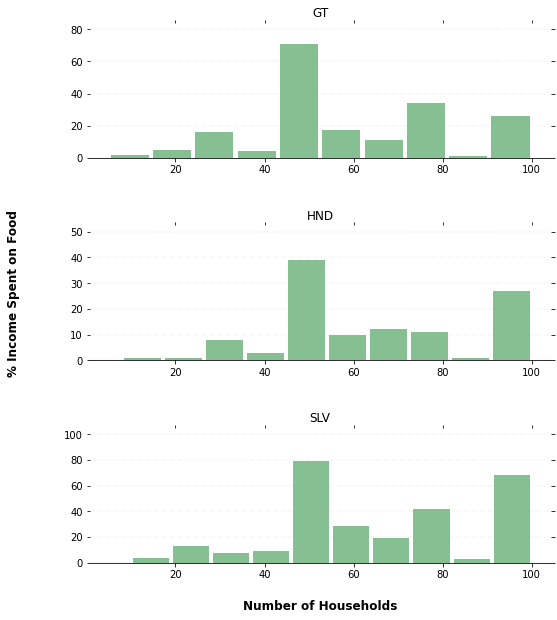

In [103]:
from matplotlib.ticker import StrMethodFormatter
ax = BasicNeeds_data.hist(column='Food', by='country', grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Number of Households", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("% Income Spent on Food", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

<AxesSubplot:title={'center':'Histogram Of basicneeds'}, ylabel='Frequency'>

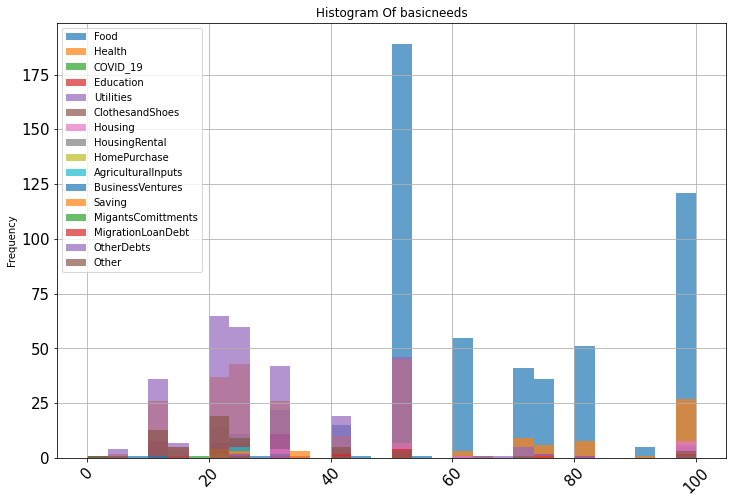

In [104]:
BasicNeeds_data.loc[:,'Food':'Other'].plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Histogram Of basicneeds',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15)


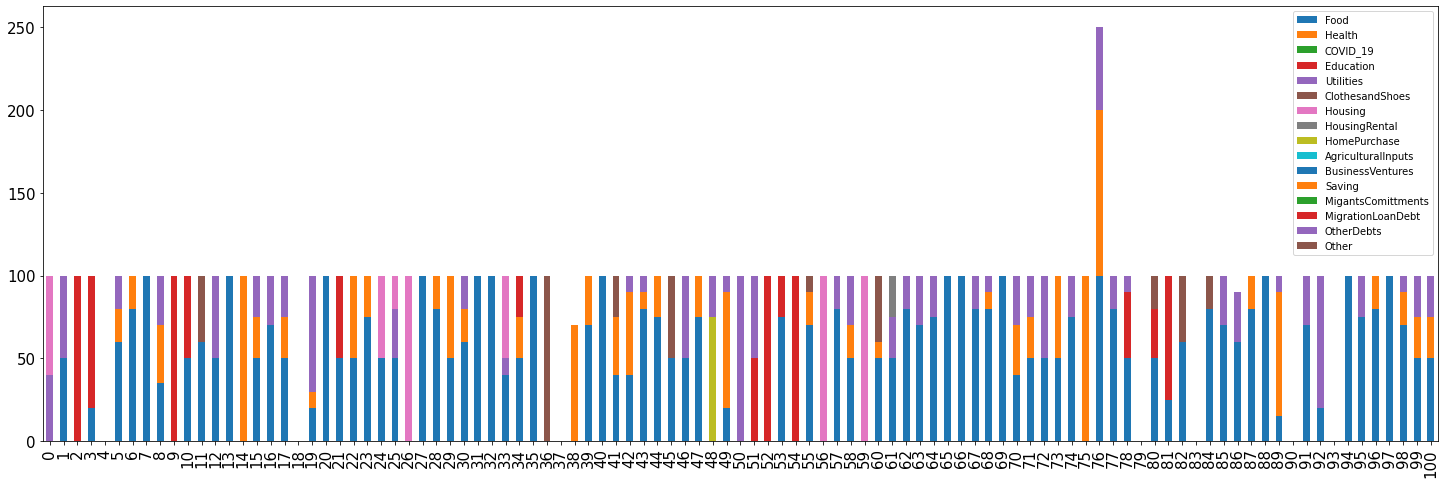

In [105]:
BasicNeeds_data_new =BasicNeeds_data.reset_index(drop=True)
BasicNeeds_data_new.loc[:100,'Food':'Other'].plot.bar(stacked=True,figsize=(25,8),
        fontsize=15);

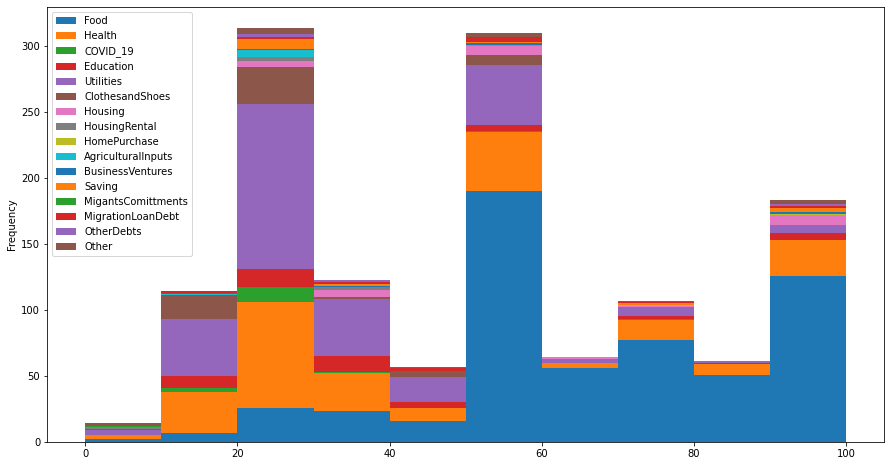

In [106]:
BasicNeeds_data_new.loc[:,'Food':'Other'].plot.hist(stacked=True,figsize=(15,8));

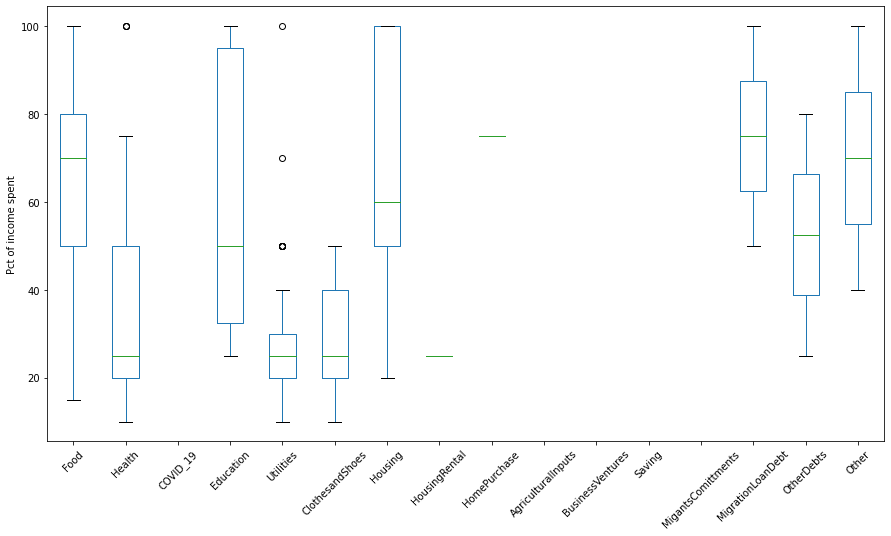

In [107]:
BasicNeeds_data_new.loc[:100,'Food':'Other'].plot.box(rot=45,
                                                        ylabel='Pct of income spent',
                                                        figsize=(15,8));

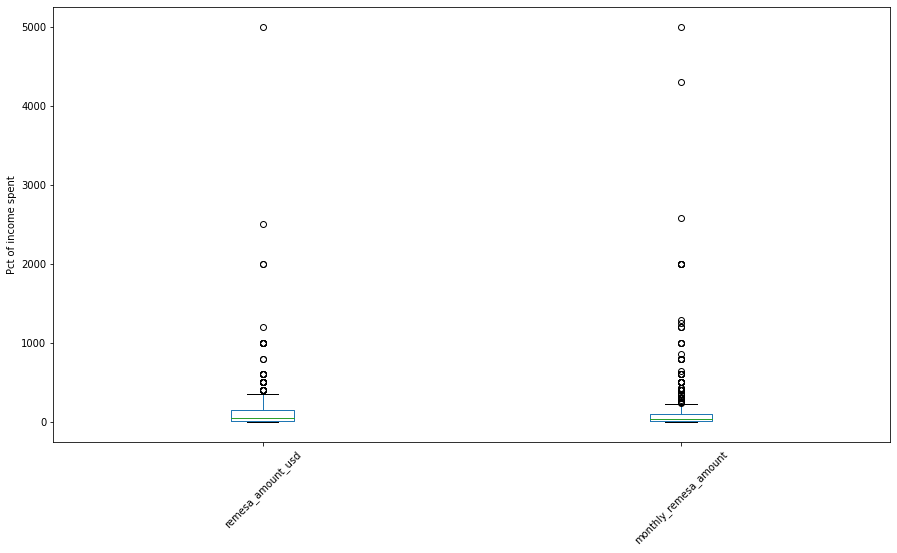

In [118]:
BasicNeeds_data_new.loc[:,'remesa_amount_usd':'monthly_remesa_amount'].plot.box(rot=45,
                                                        ylabel='Pct of income spent',
                                                        figsize=(15,8));

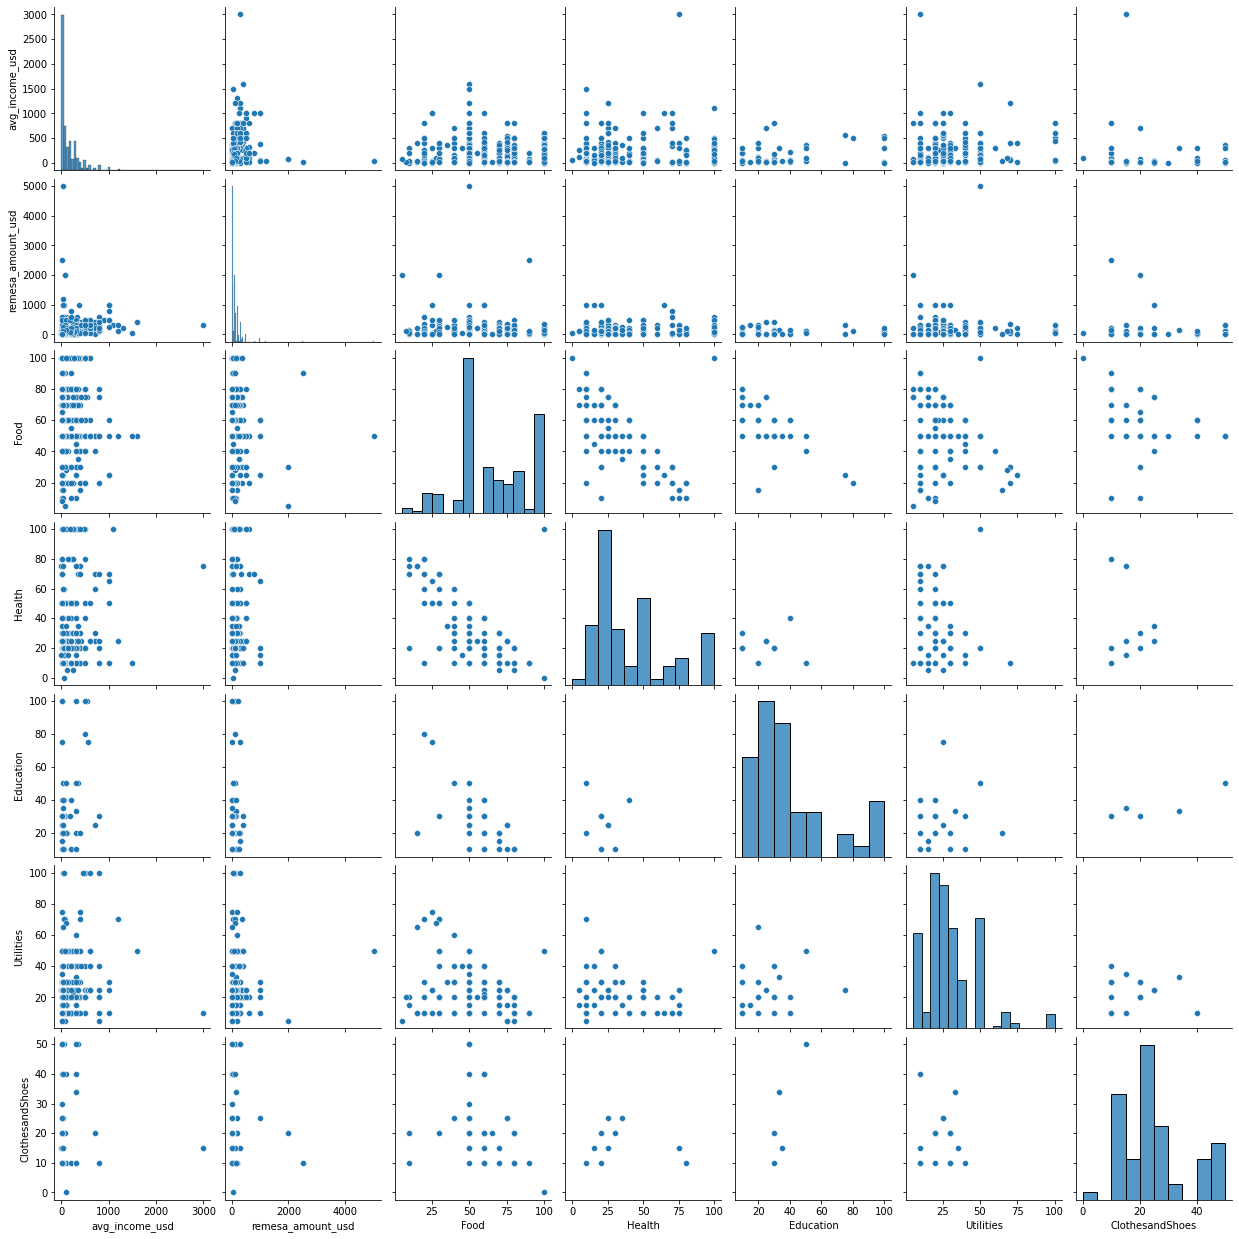

In [108]:
import seaborn as sns
factors = BasicNeeds_data_new[['avg_income_usd','remesa_amount_usd','Food', 'Health', 'Education', 'Utilities', 'ClothesandShoes']]
sns.pairplot(factors)

In [109]:
BasicNeeds_data_new

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
0,240.000,SLV,2,100.000,100.000,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
1,600.000,SLV,2,300.000,100.000,50.0,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,550.000,SLV,2,75.000,75.000,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
3,500.000,SLV,2,100.000,50.000,20.0,NaN,NaN,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,180.000,SLV,2,150.000,50.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,175.000,SLV,1,75.000,150.000,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
705,100.000,SLV,1,150.000,75.000,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
706,37.310,HND,1,100.000,100.000,70.0,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
707,5.330,GT,1,7.462,14.924,50.0,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [111]:
BasicNeeds_data_new.loc[:,'Food':'Other'].describe()

,Food,Health,COVID_19,Education,Utilities,ClothesandShoes,Housing,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other
count,574.000000,252.000000,17.000000,51.000000,296.000000,61.000000,27.000000,6.000000,2.00000,7.000000,5.000000,14.000000,1.0,13.000000,6.000000,15.000000
mean,64.618467,41.111111,26.941176,36.627451,30.195946,23.344262,57.592593,20.833333,87.50000,27.142857,43.000000,45.357143,0.0,50.000000,48.333333,44.666667
std,23.733521,27.454337,15.072618,26.511855,17.638617,12.886537,30.802422,11.143010,17.67767,10.745985,34.928498,31.650999,NaN,26.925824,32.964628,34.146045
min,5.000000,0.000000,10.000000,10.000000,5.000000,0.000000,20.000000,0.000000,75.00000,15.000000,10.000000,20.000000,0.0,15.000000,25.000000,0.000000
25%,50.000000,20.000000,20.000000,20.000000,20.000000,15.000000,30.000000,20.000000,81.25000,25.000000,25.000000,21.250000,0.0,30.000000,26.250000,20.000000
50%,60.000000,30.000000,25.000000,30.000000,25.000000,20.000000,50.000000,22.500000,87.50000,25.000000,30.000000,27.500000,0.0,50.000000,30.000000,40.000000
75%,80.000000,50.000000,25.000000,40.000000,40.000000,25.000000,100.000000,28.750000,93.75000,25.000000,50.000000,68.750000,0.0,50.000000,67.500000,60.000000
max,100.000000,100.000000,75.000000,100.000000,100.000000,50.000000,100.000000,30.000000,100.00000,50.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000


In [112]:
HhNum = BasicNeeds_data_new.loc[:,'Food':'Other'].shape[0]

In [119]:
count = BasicNeeds_data_new.loc[:,'Food':'Other'].describe().loc['count']
count_summary = pd.DataFrame(count)
#count_summary .rename(columns={'count'}, inplace=True)
count_summary['Pcnt Total'] = round(100*(count_summary['count']/int(HhNum)),2)
count_summary

,count,Pcnt Total
Food,574.0,80.96
Health,252.0,35.54
COVID_19,17.0,2.40
Education,51.0,7.19
Utilities,296.0,41.75
ClothesandShoes,61.0,8.60
Housing,27.0,3.81
HousingRental,6.0,0.85
HomePurchase,2.0,0.28
AgriculturalInputs,7.0,0.99


In [123]:
BasicNeeds_data_new.loc[:,'Food':'Other'].columns


Index(['Food', 'Health', 'COVID_19', 'Education', 'Utilities',
       'ClothesandShoes', 'Housing', 'HousingRental', 'HomePurchase',
       'AgriculturalInputs', 'BusinessVentures', 'Saving',
       'MigantsComittments', 'MigrationLoanDebt', 'OtherDebts', 'Other'],
      dtype='object')

The table above shows us that food is the most common purchase as $88.5\%$ of the families confirmed that they use the money for food.

The top 5 common type of expenses amongst households are:
1. Food
2. Utilities
3. Health Expenses
4. Clothes and Shoes
5. Education

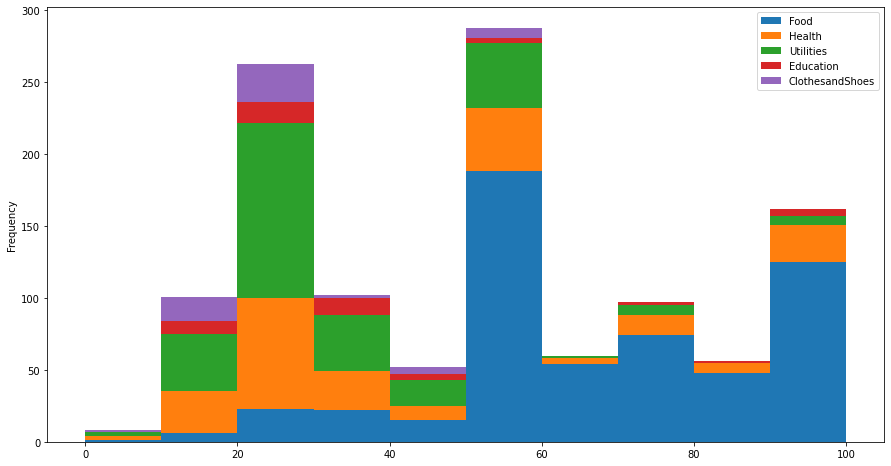

In [88]:
BasicNeeds_data_new.loc[:,['Food','Health','Utilities','Education','ClothesandShoes']].plot.hist(stacked=True,figsize=(15,8));
# BasicNeeds_data_new.loc[:,'Health'].plot.hist(stacked=True,figsize=(15,8));
# BasicNeeds_data_new.loc[:,'Utilities'].plot.hist(stacked=True,figsize=(15,8));
# BasicNeeds_data_new.loc[:,'Education'].plot.hist(stacked=True,figsize=(15,8));

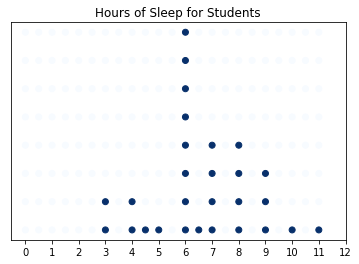

In [89]:
import matplotlib.pyplot as plt
import numpy as np

hours_of_sleep = [9, 6 ,8, 6, 8, 8, 6, 6.5, 6, 7, 9, 4, 3, 4, 5, 6, 11, 6, 3, 6, 6, 10, 7, 8, 4.5, 9, 7, 7]
bins = np.arange(0, max(hours_of_sleep) + 1, 0.5)

hist, edges = np.histogram(hours_of_sleep, bins=bins)

y = np.arange(1, hist.max() + 1)
x = np.arange(0, max(hours_of_sleep) + 0.5, 0.5)
X,Y = np.meshgrid(x,y)

plt.scatter(X, Y, c = Y<=hist, cmap="Blues")
plt.xticks(np.arange(max(hours_of_sleep) + 2))
plt.yticks([])
plt.title('Hours of Sleep for Students')
plt.show()

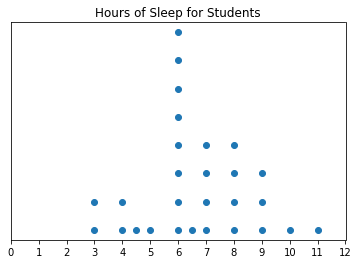

In [90]:
import matplotlib.pyplot as plt
import numpy as np

hours_of_sleep = [9, 6 ,8, 6, 8, 8, 6, 6.5, 6, 7, 9, 4, 3, 4, 5, 6, 11, 6, 3, 6, 6, 10, 7, 8, 4.5, 9, 7, 7]
bins = np.arange(0, max(hours_of_sleep) + 1, 0.5)

hist, edges = np.histogram(hours_of_sleep, bins=bins)

y = np.arange(1, hist.max() + 1)
x = np.arange(0, max(hours_of_sleep) + 0.5, 0.5)
X,Y = np.meshgrid(x,y)

Y = Y.astype(np.float)
Y[Y>hist] = None
plt.scatter(X, Y)
plt.xticks(np.arange(max(hours_of_sleep) + 2))
plt.yticks([])
plt.title('Hours of Sleep for Students')
plt.show()



In [114]:
BasicNeeds_data_new.loc[:,'Food':'Other'].index.names = ['Household']

In [115]:
BasicNeeds_data_new.to_csv('MostBasicNeeds.csv')

In [116]:
BasicNeeds_data_new.groupby(['country']).size()

country
GT     220
HND    151
SLV    338
dtype: int64

In [117]:
BasicNeeds_data_new

,avg_income_usd,country,rural_urban,remesa_amount_usd,monthly_remesa_amount,Food,Health,COVID_19,Education,Utilities,...,HousingRental,HomePurchase,AgriculturalInputs,BusinessVentures,Saving,MigantsComittments,MigrationLoanDebt,OtherDebts,Other,Tsum_check
Household,,,,,,,,,,,,,,,,,,,,,
0,240.000,SLV,2,100.000,100.000,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
1,600.000,SLV,2,300.000,100.000,50.0,NaN,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,550.000,SLV,2,75.000,75.000,NaN,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
3,500.000,SLV,2,100.000,50.000,20.0,NaN,NaN,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,180.000,SLV,2,150.000,50.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,175.000,SLV,1,75.000,150.000,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
705,100.000,SLV,1,150.000,75.000,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
706,37.310,HND,1,100.000,100.000,70.0,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [95]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [96]:
!git add .
!git commit -m "New CSV file with just basic needs data extracted"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [97]:
!git push


To github.com:Shakes-tzd/bigdata.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'github.com:Shakes-tzd/bigdata.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [98]:
# main_table.remesa_efectivo_uso, main_table.remesa_efectivo_uso_pct

In [99]:
remit_and_consents_df.to_csv('vis_vars_v1.csv')

In [100]:
!ls

BasicNeeds.csv	index.html	 MostBasicNeeds      README.md
bubbles.js	index.js	 MostBasicNeeds.csv  styles.css
data		interactive_viz  python_notebooks    vis_vars_v1.csv
